In [478]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/quora-insincere-questions-classification/sample_submission.csv
/kaggle/input/quora-insincere-questions-classification/embeddings.zip
/kaggle/input/quora-insincere-questions-classification/train.csv
/kaggle/input/quora-insincere-questions-classification/test.csv
/kaggle/input/trained-model/trained_model.pkl
/kaggle/input/preprocessed/preprocessed_questions.csv
/kaggle/input/wikinews300d1msubwordvec/wiki-news-300d-1M-subword.vec
/kaggle/input/processed-data2/processed_data(2).pkl
/kaggle/input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin


In [479]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [480]:
# Load training data
train_df = pd.read_csv('/kaggle/input/quora-insincere-questions-classification/train.csv')

In [481]:
train_df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


# **1. EDA**

In [482]:
import string
from nltk.corpus import stopwords

# Set up contraction dictionary
contraction_dict = {"dont": "do not", "aint": "is not", "isnt": "is not", "doesnt": "does not", "cant": "cannot", "mustnt": "must not", "hasnt": "has not", "havent": "have not", "arent": "are not", "ain't": "is not", "aren't": "are not","can't": "cannot", "‘cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "Iam": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will", "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

# Set up stop words list
stop_words = stopwords.words('english')
stop_words.remove('not')

# Set up puntuation list
punctuation = string.punctuation

In [483]:
train_df.shape

(500, 3)

In [484]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qid            500 non-null    object
 1   question_text  500 non-null    object
 2   target         500 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 11.8+ KB


In [485]:
# Rename the *question_text* column for convenience
train_df = train_df.rename({'question_text': 'question'}, axis=1)

In [486]:
train_df['question'].isnull().sum()

0

In [487]:
train_df['question'].isna().sum()

0

No null values in train_df

In [488]:
train_df.columns

Index(['qid', 'question', 'target'], dtype='object')

In [489]:
train_df.target.value_counts()

0    472
1     28
Name: target, dtype: int64

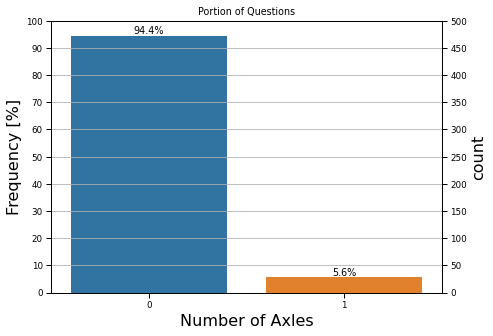

In [490]:
import matplotlib.ticker as ticker

ncount = train_df.shape[0]

plt.figure(figsize=(7, 5))

ax = sns.countplot(data=train_df, x='target')
plt.title('Portion of Questions')
plt.xlabel('Number of Axles')

# Make twin axis
ax2=ax.twinx()

# Switch so count axis is on right, frequency on left
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Also switch the labels over
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Fix the frequency range to 0-100
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)

# And use a MultipleLocator to ensure a tick spacing of 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
ax2.grid(None)

Greate unbalanced between class 0 & 1

In [491]:
pd.set_option('display.max_columns', None)
insincere_qes = train_df[train_df['target'] == 1]
print(insincere_qes[-5:].question.to_string())

397                    Do moms have sex with their sons?
400    Why did the Pope say that "Muslims are a curse...
439    How peoples in India seems hypocritical about ...
460    How much more political fumbling will it take ...
496    Why do Americans prefer just to not show up so...


In [492]:
pd.set_option('display.max_columns', None)
sincere_qes = train_df[train_df['target'] == 0]
print(sincere_qes[-5:].question)

494    When he has to go somewhere or take or do some...
495    What does curvature of space time mean. We kno...
497         How harmful is electromagnetic interference?
498    How can I distinguish between relative scales ...
499                               Do we feel our breath?
Name: question, dtype: object


**Words cloud**

In [493]:
from wordcloud import WordCloud

Word cloud image generated from insincere questions


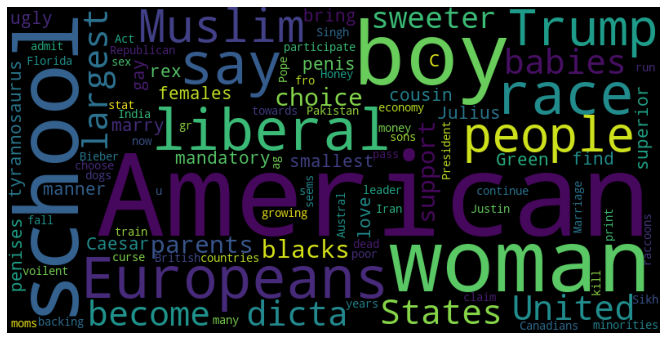

In [494]:
print('Word cloud image generated from insincere questions')
insincere_wordcloud = WordCloud(width=800, height=400, background_color ='black', min_font_size = 10).generate(str(train_df[train_df["target"] == 1]["question"]))
#Positive Word cloud
plt.figure(figsize=(15,6), facecolor=None)
plt.imshow(insincere_wordcloud)
plt.axis("off")
# plt.tight_layout(pad=0)
plt.show();

Word cloud image generated from sincere questions


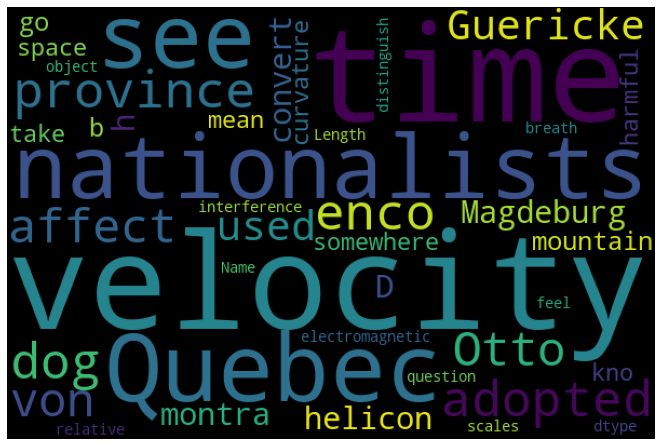

In [495]:
print('Word cloud image generated from sincere questions')
sincere_wordcloud = WordCloud(width=600, height=400, background_color ='black', min_font_size = 10).generate(str(train_df[train_df["target"] == 0]["question"]))
#Positive Word cloud
plt.figure(figsize=(15,6), facecolor=None)
plt.imshow(sincere_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show();

## **Feature engineering** 

In [496]:
train_df.head()

,qid,question,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [497]:
import string
from nltk.corpus import stopwords

# Set up contraction dictionary
contraction_dict = {"dont": "do not", "aint": "is not", "isnt": "is not", "doesnt": "does not", "cant": "cannot", "mustnt": "must not", "hasnt": "has not", "havent": "have not", "arent": "are not", "ain't": "is not", "aren't": "are not","can't": "cannot", "‘cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "Iam": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will", "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

# Set up stop words list
stop_words = stopwords.words('english')
stop_words.remove('not')

# Set up puntuation list
punctuation = string.punctuation

In [498]:
#Feature Engineering on train_df data

def create_features(df):
    """Retrieve from the text column the number of: characters, words, unique words, stopwords,
    punctuations, upper/lower case chars"""
    df["lenght"] = df["question"].apply(lambda x: len(str(x)))
    df["no_words"] = df["question"].apply(lambda x: len(x.split()))
    df["no_unique_words"] = df["question"].apply(lambda x: len(set(str(x).split())))
    df["no_stopwords"] = df["question"].apply(lambda x : len([nw for nw in str(x).split() if nw.lower() in stop_words]))
    df["no_punctuation"] = df["question"].apply(lambda x : len([np for np in str(x) if np in punctuation]))
    df["no_uppercase"] = df["question"].apply(lambda x : len([nu for nu in str(x).split() if nu.isupper()]))
    df["no_lowercase"] = df["question"].apply(lambda x : len([nl for nl in str(x).split() if nl.islower()]))
    return df

In [499]:
train_df = create_features(train_df)

The statistics of sincere questions

In [500]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
train_df[train_df['target'] == 0].describe()

,target,lenght,no_words,no_unique_words,no_stopwords,no_punctuation,no_uppercase,no_lowercase
count,472.000,472.000,472.000,472.000,472.000,472.000,472.000,472.000
mean,0.000,70.163,12.684,12.070,6.144,1.814,0.424,10.157
std,0.000,37.295,6.815,5.861,3.790,2.147,0.789,6.335
min,0.000,12.000,3.000,3.000,1.000,1.000,0.000,1.000
25%,0.000,44.750,8.000,8.000,4.000,1.000,0.000,6.000
50%,0.000,60.000,11.000,11.000,5.000,1.000,0.000,8.000
75%,0.000,84.000,15.000,14.250,7.000,2.000,1.000,12.000
max,0.000,250.000,46.000,41.000,29.000,39.000,5.000,42.000


The statistics of insincere questions

In [501]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
train_df[train_df['target'] == 1].describe()

,target,lenght,no_words,no_unique_words,no_stopwords,no_punctuation,no_uppercase,no_lowercase
count,28.000,28.000,28.000,28.000,28.000,28.000,28.000,28.000
mean,1.000,106.000,19.000,17.250,8.964,2.464,0.321,15.393
std,0.000,54.325,10.180,7.966,5.712,1.915,0.983,9.061
min,1.000,33.000,6.000,6.000,2.000,1.000,0.000,4.000
25%,1.000,66.500,12.500,12.250,5.750,1.000,0.000,9.500
50%,1.000,100.500,16.000,15.500,7.000,2.000,0.000,13.000
75%,1.000,139.500,24.000,23.000,10.000,3.000,0.000,20.500
max,1.000,228.000,42.000,36.000,24.000,10.000,5.000,37.000


<Figure size 1080x1080 with 0 Axes>

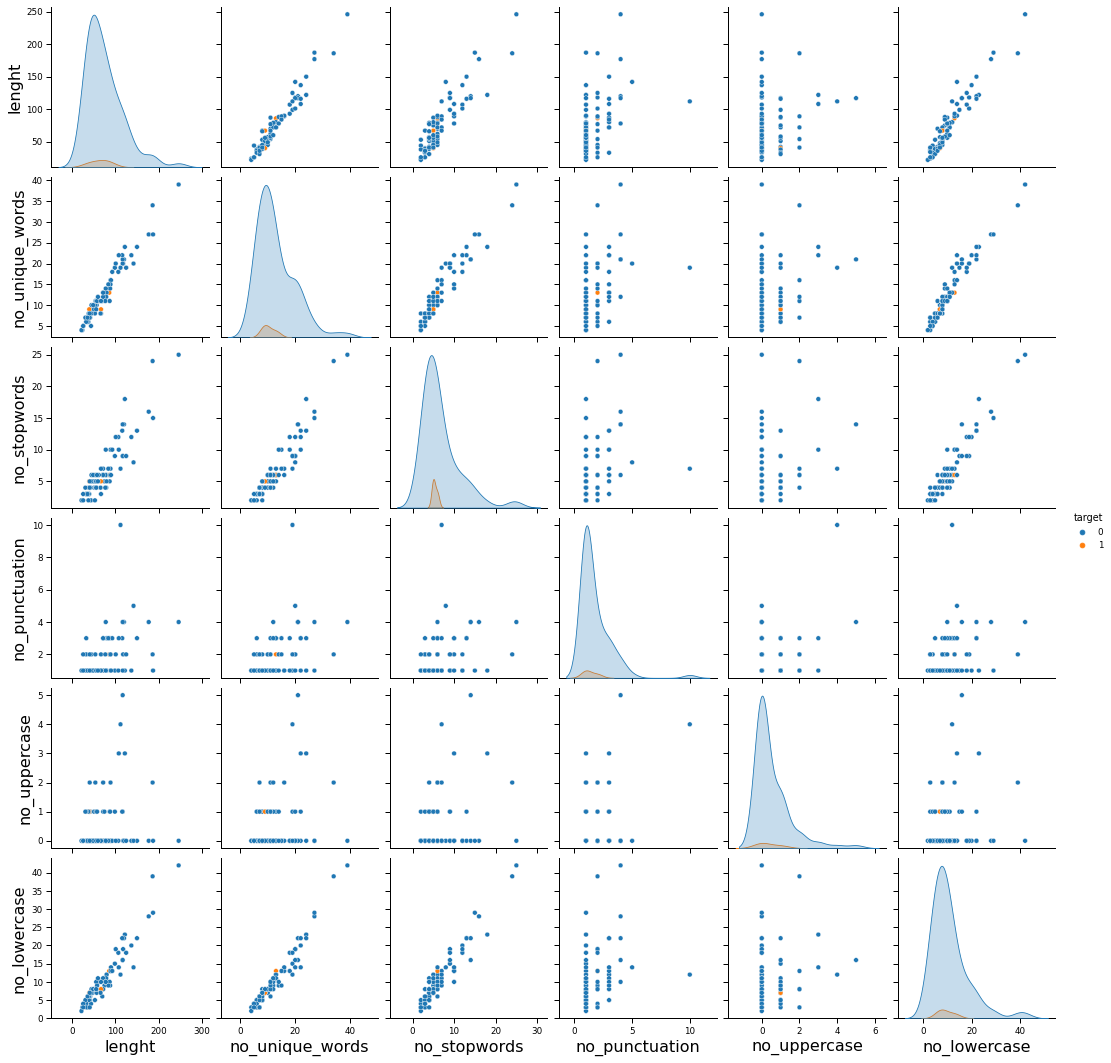

In [502]:
num_feat = ['lenght', 'no_unique_words', 'no_stopwords', 
            'no_punctuation', 'no_uppercase', 'no_lowercase', 'target'] 
# side note : remove target if needed later

dfsample = train_df[num_feat].sample(n=round(train_df.shape[0]/6), random_state=42)

plt.figure(figsize=(15,15))
sns.set_context("paper", rc={"axes.labelsize":16})
sns.pairplot(data=dfsample, hue='target')
plt.show()

****Correlation Matrix****

Text(0.5, 1.0, "Distribution of the question's number of lowercases")

<Figure size 720x720 with 0 Axes>

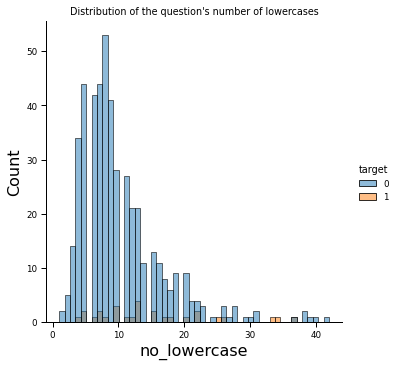

In [503]:
plt.figure(figsize=(10, 10))
sns.displot(train_df, x='no_lowercase', hue='target', kind='hist', bins=50)
plt.title("Distribution of the question's number of lowercases")

In [504]:
target_correlation = train_df.corr()['target'][1:]

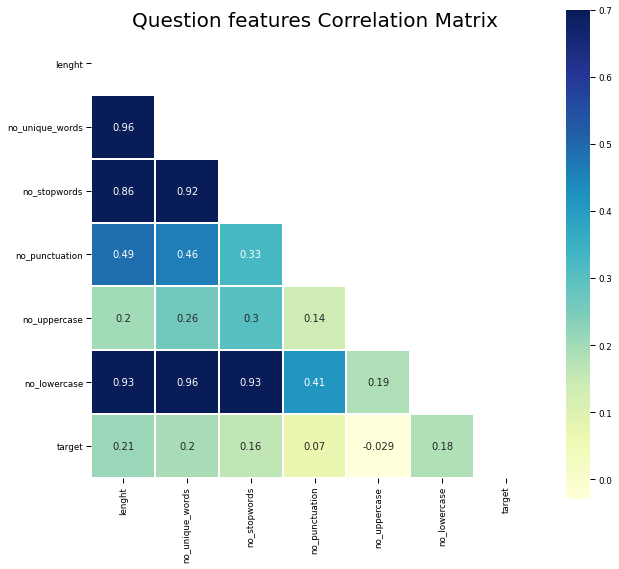

In [505]:
mask = np.zeros_like(train_df[num_feat].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(10, 10))
plt.title('Question features Correlation Matrix',fontsize=20)

sns.heatmap(train_df[num_feat].corr(),square=True, linewidths=0.25,vmax=0.7,cmap="YlGnBu",
            linecolor='w',annot=True,annot_kws={"size":10},mask=mask,cbar_kws={"shrink": .9});

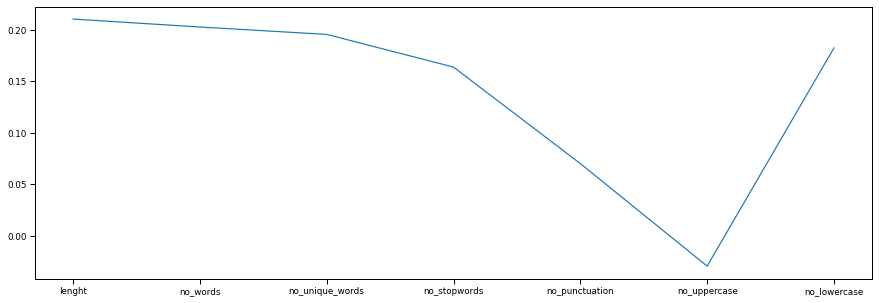

In [506]:
plt.figure(figsize=(15, 5))

target_correlation = train_df.corr()['target'][1:]
plt.plot(target_correlation)

# **2. Data Preprocessing**

In [507]:
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer

lemmatizer = WordNetLemmatizer()
stemmer = SnowballStemmer('english')

In [508]:
train_df['question']

0      How did Quebec nationalists see their province...
1      Do you have an adopted dog, how would you enco...
2      Why does velocity affect time? Does velocity a...
3      How did Otto von Guericke used the Magdeburg h...
4      Can I convert montra helicon D to a mountain b...
                             ...                        
495    What does curvature of space time mean. We kno...
496    Why do Americans prefer just to not show up so...
497         How harmful is electromagnetic interference?
498    How can I distinguish between relative scales ...
499                               Do we feel our breath?
Name: question, Length: 500, dtype: object

**Load processed data (if exist)**

In [509]:
# import pickle

# Pkl_Filename = "../input/processed-data2/processed_data(2).pkl"

# with open(Pkl_Filename, 'rb') as file:  
#     train_df = pickle.load(file)

In [510]:
train_df

,qid,question,target,lenght,no_words,no_unique_words,no_stopwords,no_punctuation,no_uppercase,no_lowercase
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,72,13,13,7,1,0,11
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,81,16,15,8,2,0,15
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,67,10,8,3,2,0,8
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,57,9,9,3,1,0,5
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,77,15,15,8,1,2,12
...,...,...,...,...,...,...,...,...,...,...
495,001752a54bf15792603e,What does curvature of space time mean. We kno...,0,120,24,21,14,4,0,22
496,00175f5e9c85b110614e,Why do Americans prefer just to not show up so...,1,228,41,36,18,4,1,37
497,00176456d6ddced07e7b,How harmful is electromagnetic interference?,0,44,5,5,2,1,0,4
498,00176686b72a7ab45980,How can I distinguish between relative scales ...,0,102,19,17,10,3,3,13


In [511]:
##number of words
train_df["num_words"]= train_df.question.apply(lambda x: len(str(x).split()))

In [512]:
# Number of unique words 
train_df["num_unique_words"] = train_df["question"].apply(lambda x: len(set(str(x).split())))

In [513]:
# length based features
train_df['len_text'] = train_df.question.apply(lambda x: len(str(x)))

In [514]:
# character length based features
train_df['len_char_question_text'] = train_df.question.apply(lambda x: 
                  len(''.join(set(str(x).replace(' ', '')))))

In [515]:
# word length based features
train_df['len_word_question_text'] = train_df.question.apply(lambda x: 
                                         len(str(x).split()))

In [516]:
from wordcloud import STOPWORDS

# Number of stopwords 
train_df["num_stopwords"] = train_df["question"].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

In [517]:
# common words in the dataset
train_df['common_words'] = train_df.apply(lambda x: 
                        len(set(str(x['question'])
                        .lower().split())), axis=1)

In [518]:
# Average length of the words 
train_df["len_mean_words"] = train_df["question"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [519]:
train_df.head()

,qid,question,target,lenght,no_words,no_unique_words,no_stopwords,no_punctuation,no_uppercase,no_lowercase,num_words,num_unique_words,len_text,len_char_question_text,len_word_question_text,num_stopwords,common_words,len_mean_words
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,72,13,13,7,1,0,11,13,13,72,24,13,7,13,4.615
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,81,16,15,8,2,0,15,16,15,81,20,16,10,15,4.125
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,67,10,8,3,2,0,8,10,8,67,20,10,3,7,5.800
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,57,9,9,3,1,0,5,9,9,57,24,9,3,9,5.444
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,77,15,15,8,1,2,12,15,15,77,23,15,7,15,4.200


In [520]:
fs_1 = ['num_words','num_unique_words','len_question_text', 'len_char_question_text', 
        'len_word_question_text','num_stopwords','common_words','len_mean_words']

In [521]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfv_data = TfidfVectorizer(min_df=0.01, 
                            max_df = 0.99,
                         max_features=None, 
                         strip_accents='unicode', 
                         analyzer='word', 
                         token_pattern=r'\w{1,}',
                         ngram_range=(1, 2), 
                         use_idf=1,  
                         smooth_idf=1, 
                         sublinear_tf=1,
                         stop_words='english')

In [522]:
from sklearn.decomposition import TruncatedSVD
from scipy.stats import skew, kurtosis
import gc

data_tfidf = tfv_data.fit_transform(train_df.question.fillna(""))
svd_data = TruncatedSVD(n_components=50)
question_data_vectors = svd_data.fit_transform(data_tfidf)
train_df['skew_question_text_vec'] = [skew(x) for x in np.nan_to_num(question_data_vectors)]
train_df['kur_question_text_vec'] = [kurtosis(x) for x in np.nan_to_num(question_data_vectors)]
fs_2 = ['skew_question_text_vec', 'kur_question_text_vec']
del([tfv_data, data_tfidf,svd_data,question_data_vectors])
gc.collect()
train_df.head()

,qid,question,target,lenght,no_words,no_unique_words,no_stopwords,no_punctuation,no_uppercase,no_lowercase,num_words,num_unique_words,len_text,len_char_question_text,len_word_question_text,num_stopwords,common_words,len_mean_words,skew_question_text_vec,kur_question_text_vec
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,72,13,13,7,1,0,11,13,13,72,24,13,7,13,4.615,4.583,28.812
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,81,16,15,8,2,0,15,16,15,81,20,16,10,15,4.125,2.702,15.693
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,67,10,8,3,2,0,8,10,8,67,20,10,3,7,5.800,3.847,20.167
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,57,9,9,3,1,0,5,9,9,57,24,9,3,9,5.444,2.316,6.788
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,77,15,15,8,1,2,12,15,15,77,23,15,7,15,4.200,-0.003,1.655


In [523]:
from scipy.spatial.distance import cosine, cityblock, jaccard, canberra, euclidean, minkowski, braycurtis
import gensim

model1 = gensim.models.KeyedVectors.load_word2vec_format('../input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin', binary=True)
model2 = gensim.models.KeyedVectors.load_word2vec_format('../input/wikinews300d1msubwordvec/wiki-news-300d-1M-subword.vec', binary=False)
stop_words = set(stopwords.words('english'))
def sent2vec(s, model):  
    M = []
    words = word_tokenize(str(s).lower())
    for word in words:
        #It shouldn't be a stopword
        if word not in stop_words:
            #nor contain numbers
            if word.isalpha():
                #and be part of Word2Vec
                if word in model:
                    M.append(model[word])
    M = np.array(M)
    if len(M) > 0:
        v = M.sum(axis=0)
        return v / np.sqrt((v ** 2).sum())
    else:
        return model.get_vector('null')

w2v_qt1 = np.array([sent2vec(q, model1) 
                   for q in train_df.question])
w2v_qt2 = np.array([sent2vec(q, model2) 
                   for q in train_df.question])


In [524]:
train_df['cosine_distance'] = [cosine(x,y) for (x,y) in zip(w2v_qt1,w2v_qt2)]
train_df['cityblock_distance'] = [cityblock(x,y) for (x,y) in zip(w2v_qt1,w2v_qt2)]
train_df['jaccard_distance'] = [jaccard(x,y) for (x,y) in zip(w2v_qt1,w2v_qt2)]
train_df['canberra_distance'] = [canberra(x,y) for (x,y) in zip(w2v_qt1,w2v_qt2)]
train_df['euclidean_distance'] = [euclidean(x,y) for (x,y) in zip(w2v_qt1,w2v_qt2)]
train_df['minkowski_distance'] = [minkowski(x,y,3) for (x,y) in zip(w2v_qt1,w2v_qt2)]
train_df['braycurtis_distance'] = [braycurtis(x,y) for (x,y) in zip(w2v_qt1,w2v_qt2)]

fs_3 = ['cosine_distance', 'cityblock_distance', 
         'jaccard_distance', 'canberra_distance', 
         'euclidean_distance', 'minkowski_distance',
         'braycurtis_distance']

del([w2v_qt1, w2v_qt2, model1,model2])
gc.collect()

22

In [525]:
train_df.head()

,qid,question,target,lenght,no_words,no_unique_words,no_stopwords,no_punctuation,no_uppercase,no_lowercase,num_words,num_unique_words,len_text,len_char_question_text,len_word_question_text,num_stopwords,common_words,len_mean_words,skew_question_text_vec,kur_question_text_vec,cosine_distance,cityblock_distance,jaccard_distance,canberra_distance,euclidean_distance,minkowski_distance,braycurtis_distance
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,72,13,13,7,1,0,11,13,13,72,24,13,7,13,4.615,4.583,28.812,0.927,18.674,1.000,222.799,1.362,0.617,0.971
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,81,16,15,8,2,0,15,16,15,81,20,16,10,15,4.125,2.702,15.693,0.970,18.647,1.000,218.473,1.393,0.639,0.966
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,67,10,8,3,2,0,8,10,8,67,20,10,3,7,5.800,3.847,20.167,0.990,18.728,1.000,213.379,1.407,0.652,0.959
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,57,9,9,3,1,0,5,9,9,57,24,9,3,9,5.444,2.316,6.788,1.023,19.503,1.000,217.362,1.430,0.652,1.020
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,77,15,15,8,1,2,12,15,15,77,23,15,7,15,4.200,-0.003,1.655,1.051,19.821,1.000,221.117,1.450,0.662,1.056


In [526]:
train_df[train_df["target"]==1].target.value_counts()

1    28
Name: target, dtype: int64

In [527]:
train_df[train_df["target"]==0].target.value_counts()

0    472
Name: target, dtype: int64

**Save processed data**

In [528]:
import pickle

Pkl_Filename = "processed_data.pkl"

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(train_df, file)

# **3. Train model**

In [530]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import f1_score, confusion_matrix, classification_report

train_df.dropna(how='any', inplace=True)

X = train_df['question']
y = train_df.target

In [531]:
train_df.shape

(500, 27)

In [532]:
X

0      How did Quebec nationalists see their province...
1      Do you have an adopted dog, how would you enco...
2      Why does velocity affect time? Does velocity a...
3      How did Otto von Guericke used the Magdeburg h...
4      Can I convert montra helicon D to a mountain b...
                             ...                        
495    What does curvature of space time mean. We kno...
496    Why do Americans prefer just to not show up so...
497         How harmful is electromagnetic interference?
498    How can I distinguish between relative scales ...
499                               Do we feel our breath?
Name: question, Length: 500, dtype: object

In [535]:
y

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    1
497    0
498    0
499    0
Name: target, Length: 500, dtype: int64

In [536]:
y = train_df.iloc[:,2].values
columns = [10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]
X = train_df.iloc[0:1306122,columns].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

**Optimal threshold for Logistic regression**

In [ ]:
from numpy import arange
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

**Load trained model (if exist)**

In [ ]:
# import pickle

# Pkl_Filename = "../input/trained-model/trained_model.pkl"

# with open(Pkl_Filename, 'rb') as file:  
#     model = pickle.load(file)

In [ ]:
# fit a model
model = LogisticRegression(solver='saga', max_iter=1000)
model.fit(X_train, y_train)

**Save trained model**

In [ ]:
import pickle

Pkl_Filename = "trained_model.pkl"

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

**Predict on test set**

In [ ]:
lr_preds = model.predict(X_test)
from sklearn.metrics import f1_score
F1_score = f1_score(y_test, lr_preds, average='weighted')
print("Logistic regression F1 score: %0.3f" % F1_score)

In [ ]:
# Use decision_function method.
decision_function = model.decision_function(X_test)

In [ ]:
# Actual obtained results without any manual setting of Decision Threshold.
predict_actual = model.predict(X_test)       # Predict using classifier.
accuracy_actual = model.score(X_test, y_test)
classification_report_actual = classification_report(y_test, predict_actual)
print(predict_actual, accuracy_actual, classification_report_actual, sep ='\n')

**Plot precision & recall curve**

In [ ]:
# Plot Precision-Recall curve using sklearn.
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_test, decision_function)
  
# # Plot the output.
# plt.plot(threshold, precision[:-1], c ='r', label ='PRECISION')
# plt.plot(threshold, recall[:-1], c ='b', label ='RECALL')
# plt.grid()
# plt.legend()
# plt.title('Precision-Recall Curve')

# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

**Predict with new threshold**

In [ ]:
df = model.decision_function(X_test)
decision_teshold = 0.85
desired_predict =[]
for i in df:
    if i<decision_teshold:
        desired_predict.append(0)
    else:
        desired_predict.append(1)

from sklearn.metrics import precision_score
print("old precision value:", precision_score(y_test, predict_actual))
print("new precision value:", precision_score(y_test, desired_predict))

# **4. Predict test data and output submission**

**Load dataset**

In [537]:
test_df = pd.read_csv('/kaggle/input/quora-insincere-questions-classification/test.csv')

In [538]:
test_df.head()

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


In [539]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qid            500 non-null    object
 1   question_text  500 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


In [540]:
test_df.shape

(500, 2)

**Preprocessing test data**

In [541]:
# test_df['preprocessed'] = test_df['question_text'].apply(qes_preprocessing)

In [542]:
# number of words 
test_df["num_words"]= test_df.question_text.apply(lambda x: len(str(x).split()))

In [543]:
# Number of unique words 
test_df["num_unique_words"] = test_df["question_text"].apply(lambda x: len(set(str(x).split())))

In [544]:
# length based features
test_df['len_text'] = test_df.question_text.apply(lambda x: len(str(x)))

In [545]:
# character length based features
test_df['len_char_question_text'] = test_df.question_text.apply(lambda x: 
                  len(''.join(set(str(x).replace(' ', '')))))

In [546]:
# word length based features
test_df['len_word_question_text'] = test_df.question_text.apply(lambda x: 
                                         len(str(x).split()))

In [547]:
# Number of stopwords 
test_df["num_stopwords"] = test_df["question_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

In [548]:
# common words in the dataset
test_df['common_words'] = test_df.apply(lambda x: 
                        len(set(str(x['question_text'])
                        .lower().split())), axis=1)

In [549]:
# Average length of the words
test_df["len_mean_words"] = test_df["question_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [550]:
test_df.head()

,qid,question_text,num_words,num_unique_words,len_text,len_char_question_text,len_word_question_text,num_stopwords,common_words,len_mean_words
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...,21,19,101,23,21,12,19,3.857
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...,30,23,162,33,30,17,22,4.433
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...,10,10,50,18,10,7,10,4.100
3,000086e4b7e1c7146103,Who are entrepreneurs?,3,3,22,12,3,2,3,6.667
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?,7,7,48,20,7,1,7,6.000


In [551]:
fs_1 = ['num_words','num_unique_words','len_question_text', 'len_char_question_text', 
        'len_word_question_text','num_stopwords','common_words','len_mean_words']

In [552]:
tfv_data = TfidfVectorizer(min_df=0.001,
                           max_df=0.99,
                         max_features=None, 
                         strip_accents='unicode', 
                         analyzer='word', 
                         token_pattern=r'\w{1,}',
                         ngram_range=(1, 2), 
                         use_idf=1, 
                         smooth_idf=1, 
                         sublinear_tf=1,
                         stop_words='english')

In [553]:
data_tfidf = tfv_data.fit_transform(test_df.question_text.fillna(""))
svd_data = TruncatedSVD(n_components=180)
question_data_vectors = svd_data.fit_transform(data_tfidf)
test_df['skew_question_text_vec'] = [skew(x) for x in np.nan_to_num(question_data_vectors)]
test_df['kur_question_text_vec'] = [kurtosis(x) for x in np.nan_to_num(question_data_vectors)]
fs_2 = ['skew_question_text_vec', 'kur_question_text_vec']
del([tfv_data, data_tfidf,svd_data,question_data_vectors])
gc.collect()
test_df.head()

,qid,question_text,num_words,num_unique_words,len_text,len_char_question_text,len_word_question_text,num_stopwords,common_words,len_mean_words,skew_question_text_vec,kur_question_text_vec
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...,21,19,101,23,21,12,19,3.857,0.762,8.103
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...,30,23,162,33,30,17,22,4.433,0.979,4.215
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...,10,10,50,18,10,7,10,4.100,0.385,6.870
3,000086e4b7e1c7146103,Who are entrepreneurs?,3,3,22,12,3,2,3,6.667,0.488,4.480
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?,7,7,48,20,7,1,7,6.000,0.224,4.499


In [554]:
model1 = gensim.models.KeyedVectors.load_word2vec_format('../input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin', binary=True)
model2 = gensim.models.KeyedVectors.load_word2vec_format('../input/wikinews300d1msubwordvec/wiki-news-300d-1M-subword.vec', binary=False)
stop_words = set(stopwords.words('english'))
def sent2vec(s, model):  
    M = []
    words = word_tokenize(str(s).lower())
    for word in words:
        #It shouldn't be a stopword
        if word not in stop_words:
            #nor contain numbers
            if word.isalpha():
                #and be part of Word2Vec
                if word in model:
                    M.append(model[word])
    M = np.array(M)
    if len(M) > 0:
        v = M.sum(axis=0)
        return v / np.sqrt((v ** 2).sum())
    else:
        return model.get_vector('null')

w2v_qt1 = np.array([sent2vec(q, model1) 
                   for q in test_df.question_text])
w2v_qt2 = np.array([sent2vec(q, model2) 
                   for q in test_df.question_text])


test_df['cosine_distance'] = [cosine(x,y) for (x,y) in zip(w2v_qt1,w2v_qt2)]
test_df['cityblock_distance'] = [cityblock(x,y) for (x,y) in zip(w2v_qt1,w2v_qt2)]
test_df['jaccard_distance'] = [jaccard(x,y) for (x,y) in zip(w2v_qt1,w2v_qt2)]
test_df['canberra_distance'] = [canberra(x,y) for (x,y) in zip(w2v_qt1,w2v_qt2)]
test_df['euclidean_distance'] = [euclidean(x,y) for (x,y) in zip(w2v_qt1,w2v_qt2)]
test_df['minkowski_distance'] = [minkowski(x,y,3) for (x,y) in zip(w2v_qt1,w2v_qt2)]
test_df['braycurtis_distance'] = [braycurtis(x,y) for (x,y) in zip(w2v_qt1,w2v_qt2)]

fs_3 = ['cosine_distance', 'cityblock_distance', 
         'jaccard_distance', 'canberra_distance', 
         'euclidean_distance', 'minkowski_distance',
         'braycurtis_distance']

del([w2v_qt1, w2v_qt2, model1,model2])
gc.collect()

0

In [555]:
test_df.head()

,qid,question_text,num_words,num_unique_words,len_text,len_char_question_text,len_word_question_text,num_stopwords,common_words,len_mean_words,skew_question_text_vec,kur_question_text_vec,cosine_distance,cityblock_distance,jaccard_distance,canberra_distance,euclidean_distance,minkowski_distance,braycurtis_distance
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...,21,19,101,23,21,12,19,3.857,0.762,8.103,0.921,18.421,1.000,227.623,1.357,0.627,0.964
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...,30,23,162,33,30,17,22,4.433,0.979,4.215,0.877,17.828,1.000,210.675,1.324,0.613,0.869
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...,10,10,50,18,10,7,10,4.100,0.385,6.870,0.861,17.165,1.000,208.214,1.312,0.625,0.868
3,000086e4b7e1c7146103,Who are entrepreneurs?,3,3,22,12,3,2,3,6.667,0.488,4.480,1.025,19.534,1.000,220.253,1.432,0.653,1.042
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?,7,7,48,20,7,1,7,6.000,0.224,4.499,0.995,19.082,1.000,228.949,1.410,0.660,1.005


In [556]:
test_df.shape

(500, 19)

In [557]:
test_df

,qid,question_text,num_words,num_unique_words,len_text,len_char_question_text,len_word_question_text,num_stopwords,common_words,len_mean_words,skew_question_text_vec,kur_question_text_vec,cosine_distance,cityblock_distance,jaccard_distance,canberra_distance,euclidean_distance,minkowski_distance,braycurtis_distance
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...,21,19,101,23,21,12,19,3.857,0.762,8.103,0.921,18.421,1.000,227.623,1.357,0.627,0.964
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...,30,23,162,33,30,17,22,4.433,0.979,4.215,0.877,17.828,1.000,210.675,1.324,0.613,0.869
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...,10,10,50,18,10,7,10,4.100,0.385,6.870,0.861,17.165,1.000,208.214,1.312,0.625,0.868
3,000086e4b7e1c7146103,Who are entrepreneurs?,3,3,22,12,3,2,3,6.667,0.488,4.480,1.025,19.534,1.000,220.253,1.432,0.653,1.042
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?,7,7,48,20,7,1,7,6.000,0.224,4.499,0.995,19.082,1.000,228.949,1.410,0.660,1.005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0054d4a1334c1057f27e,Is there anyway to convince a mentally ill per...,30,26,173,24,30,16,25,4.800,0.115,0.437,0.951,18.542,1.000,225.522,1.379,0.645,0.968
496,0054d756f89ad96277ca,Have you ever fantasized about having another ...,11,11,68,21,11,6,11,5.273,0.449,2.109,0.879,18.100,1.000,218.084,1.326,0.600,0.911
497,0054e65d6c71b5abcae2,'a convex mirror has a focal length of 18cm .T...,37,24,181,28,37,19,24,3.919,0.277,0.757,0.983,18.802,1.000,220.140,1.402,0.655,0.975
498,0055208a18cf33cf926b,How many days does it take for IELTS preparation?,9,9,49,22,9,4,9,4.556,0.213,1.908,0.964,18.621,1.000,224.032,1.389,0.651,0.954


In [558]:
X = test_df["question_text"]

In [559]:
X

0      Why do so many women become so rude and arroga...
1      When should I apply for RV college of engineer...
2      What is it really like to be a nurse practitio...
3                                 Who are entrepreneurs?
4       Is education really making good people nowadays?
                             ...                        
495    Is there anyway to convince a mentally ill per...
496    Have you ever fantasized about having another ...
497    'a convex mirror has a focal length of 18cm .T...
498    How many days does it take for IELTS preparation?
499    How many kg ice cubes is required generally in...
Name: question_text, Length: 500, dtype: object

In [560]:
columns = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
X = test_df.iloc[0:375806,columns].values

In [ ]:
X

**Make predictions**

In [561]:
predictions = model.predict(X)

In [562]:
print(len(predictions))
print(predictions[-10:])
print(test_df['question_text'][-10:])

500
[0 0 0 0 0 0 0 0 0 0]
490                            Why are unicorns rainbow?
491               Is physical conflict a waste of flesh?
492    When the ____ will fully-feathered dinosaurs g...
493    What is a list of points to consider when chec...
494             What is the European name for chemistry?
495    Is there anyway to convince a mentally ill per...
496    Have you ever fantasized about having another ...
497    'a convex mirror has a focal length of 18cm .T...
498    How many days does it take for IELTS preparation?
499    How many kg ice cubes is required generally in...
Name: question_text, dtype: object


**2.4 Make submission**

In [563]:
test_df['prediction'] = predictions
results = test_df[['qid', 'prediction']]
results.to_csv('submission.csv', index=False)
results.shape

(500, 2)